**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# a. import packeges  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize

# b. autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# c. import the py-file 
from caro import labor
from Problem3 import GoMs


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [404]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [405]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [406]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [407]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [408]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [409]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [453]:
# a. Load in class
l_model = labor()

We use the given equation to calculate the value   of the optimal $\ell_{t}$ for the 2 values of $\kappa$.
Afterwards we use an optimizer to find the values $\ell_{t}$ which maximizes the given utility function numerically. We then compare the two results.

In [454]:
# a. create starting values
k_vec = np.linspace(1,2,2)
guess = 1
par = l_model.par
# b. loop through values of kappa
for k in k_vec: 
    # i. caluclate L from fomula
    L = l_model.l_star(k)
    # ii. objective function (to minimize) 
    def objective(x):
        return -(k*(x**(1-par.eta))-par.w*x)
    # o. objective function 
    obj = lambda x: objective(x)

    # iii. optimize L
    result = optimize.minimize(obj, guess,  method = 'Nelder-Mead', bounds=[(0.000001,np.inf)])
    print(f'For kappa = {k}')
    print(f'Estimated L = {result.x[0].round(2)}')
    print(f'Calculated L = {L}')

For kappa = 1.0
Estimated L = 0.25
Calculated L = 0.25
For kappa = 2.0
Estimated L = 1.0
Calculated L = 1.0


As expected is the calculated value and estimated value for $\ell_{t}$ the same. This means that we can verify that the given equation maximize utility.
It is also posible to confirm this analytical.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

We make a function in our class which follows the instruction of the model above.
We choose a K = 100, as we see a seemingly steady value for H as this number as well as a acceptable running time for the code.

In [412]:
# a. run function to calculate H
l_model.H(out=1)

26.906014106236988

Given the policy function from Question 1, the expected value of the salon is equal to 26.9.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [413]:
l_model.H(out=2)

27.578419927210707

The new policy increases the value to 27.6. This makes sense economically as it takes into account the adjustment cost. Therefore the salon avoid making small personel changes as the fixed cost is higher than the gain of making these small adjustment to the staff.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [457]:
def objective(x):
        return -(l_model.H(out=2, Delta = x))
    # o. objective function 
obj = lambda x: objective(x)
guess = 0
result = optimize.minimize(obj, guess, method='Nelder-Mead')

print(f'Optimal Delta = {result.x[0].round(2)}')
print(f'Maximum H = {l_model.H(out=2, Delta = result.x[0])}')


Optimal Delta = 0.08
Maximum H = 27.646816824728468


The optimal $\Delta$ is equal to 0.08. The increase in value from the original $\Delta$ is only around 0.09, but is however 0.8 larger that the original policy. This indicates that the new policy is usefull, but the interval for and more optimal $\Delta$ is quite small. This is also depicted on the graph below, which show that the value H is seemingly pretty constant between 0.05 and 0.15, but that the value decreases drasticly as $\Delta$ goes above 0.25. This makes sense as this will go above just taking the adjustments cost into account.


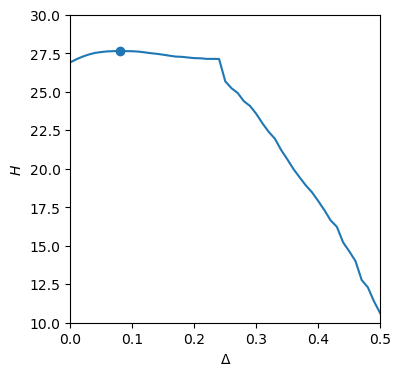

In [458]:
# a. make grid of H and Delta
Delta_max = 0.5
H_vec = np.empty(0)
Delta_vec = np.linspace(0,Delta_max,51)
for i in Delta_vec:
    H_vec = np.append(H_vec,l_model.H(out=2, Delta = i))
                

# b. plot H values
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(Delta_vec,H_vec)
ax.scatter(result.x[0].round(2),l_model.H(out=2, Delta = result.x[0]))

ax.set_xlabel('$\Delta$')
ax.set_ylabel('$H$')
ax.set_xlim([0,Delta_max])
ax.set_ylim([10,30]);


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We implement a policy which says that the salon should only make personel changes, if the absolut value of $\epsilon_{t}$ is belov the variance $\sigma_{\epsilon}$. This is to make sure that the salon only take on the extra fixed cost of adjusting in periods with less demand shocks. As the demand shocks follows a AR(1) process the high shocks of $\epsilon$ will follow into future periods, therefore it is the theory that it will be good to stay put.

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\epsilon_{t} \right|<\sigma_{\epsilon}\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$

In [459]:
l_model.H(out=3)


27.046153323360773

As we implement the policy we see that the 

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [427]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [90]:
# a. call the GoMs class 
goms = GoMs()

# b. run the global optimization
goms.global_opt()


   0: x = ( -13.87,-196.23) -> converged at ( -12.56,-195.29) with f =   9.58367609
   1: x = (-148.96,  38.44) -> converged at (-147.58,  39.95) with f =   5.84708245
   2: x = (-518.27, 101.43) -> converged at (-518.10, 102.08) with f =  69.74904156
   3: x = (-314.52,-407.09) -> converged at (-313.99,-408.33) with f =  66.38723699
   4: x = (-417.46,-447.52) -> converged at (-417.61,-448.26) with f =  93.91192731
   5: x = (-207.07, 232.98) -> converged at (-207.24, 230.80) with f =  24.07289447
   6: x = (-169.24, 469.64) -> converged at (-169.56, 470.46) with f =  62.58264265
   7: x = (-357.74,-467.28) -> converged at (-354.81,-466.02) with f =  85.84083442
   8: x = (  33.07, 441.19) -> converged at (  34.54, 439.40) with f =  48.61567718
   9: x = (-285.75,  -0.73) -> converged at (-285.74,  -4.44) with f =  20.42724970
  10: x = (-116.65,  37.98) -> converged at (-116.18,  39.95) with f =   3.77550250
  20: x = (-205.75,-224.48) -> converged at (  97.34,-173.10) with f =   9.8

array([-7.90754627e-09,  2.68156919e-09])

The above show the that it is the starting which make the 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [92]:
# a. call the GoMs class to reset the parameters
goms = GoMs()

# b. set the parameters
par = goms.par

# c. set K_bar 
par.K_bar = 100

# d. run the global optimization
goms.global_opt()

   0: x = ( -13.87,-196.23) -> converged at ( -12.56,-195.29) with f =   9.58367609
   1: x = (-148.96,  38.44) -> converged at (-147.58,  39.95) with f =   5.84708245
   2: x = (-518.27, 101.43) -> converged at (-518.10, 102.08) with f =  69.74904156
   3: x = (-314.52,-407.09) -> converged at (-313.99,-408.33) with f =  66.38723699
   4: x = (-417.46,-447.52) -> converged at (-417.61,-448.26) with f =  93.91192731
   5: x = (-207.07, 232.98) -> converged at (-207.24, 230.80) with f =  24.07289447
   6: x = (-169.24, 469.64) -> converged at (-169.56, 470.46) with f =  62.58264265
   7: x = (-357.74,-467.28) -> converged at (-354.81,-466.02) with f =  85.84083442
   8: x = (  33.07, 441.19) -> converged at (  34.54, 439.40) with f =  48.61567718
   9: x = (-285.75,  -0.73) -> converged at (-285.74,  -4.44) with f =  20.42724970
  10: x = ( -85.72,  36.00) -> converged at ( -87.92,  35.51) with f =   2.24898708
  20: x = (-408.85,-438.23) -> converged at (-408.19,-434.95) with f =  89.0

array([-7.61491021e-09, -7.81198389e-09])